In [25]:
import pandas as pd 
#import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px


In [29]:
data = pd.read_excel("Downloads/DA01 Retail_Inventory_Optimization_Data.xlsx")

In [33]:
data.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:34,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:58,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:47,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:56,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:01,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [35]:
data.tail()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
4995,4996,6898,852,Headphones,Appliances,1,682.15,2024-07-08 06:13:38,17,"New York, NY",...,Gold,Cash,False,NaN,Sunny,False,Wednesday,True,257,294
4996,4997,8412,886,Laptop,Appliances,3,1418.09,2024-02-07 11:30:11,16,"Los Angeles, CA",...,Bronze,Digital Wallet,True,NaN,Sunny,True,Sunday,True,388,397
4997,4998,8331,934,Fridge,Electronics,5,398.66,2024-08-20 00:38:16,16,"New York, NY",...,Bronze,Digital Wallet,True,NaN,Cloudy,False,Thursday,True,314,204
4998,4999,7505,439,Laptop,Appliances,3,1000.95,2024-08-26 11:05:15,16,"Miami, FL",...,Silver,Debit Card,True,NaN,Stormy,False,Tuesday,False,488,144
4999,5000,1003,926,Washing Machine,Appliances,1,710.03,2024-02-09 01:27:01,12,"New York, NY",...,Platinum,Debit Card,True,BOGO,Stormy,True,Wednesday,False,142,148


In [69]:
data.columns

Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   product_id              5000 non-null   int64         
 3   product_name            5000 non-null   object        
 4   category                5000 non-null   object        
 5   quantity_sold           5000 non-null   int64         
 6   unit_price              5000 non-null   float64       
 7   transaction_date        5000 non-null   datetime64[ns]
 8   store_id                5000 non-null   int64         
 9   store_location          5000 non-null   object        
 10  inventory_level         5000 non-null   int64         
 11  reorder_point           5000 non-null   int64         
 12  reorder_quantity        5000 non-null   int64   

In [39]:
data.describe()

,transaction_id,customer_id,product_id,quantity_sold,unit_price,transaction_date,store_id,inventory_level,reorder_point,reorder_quantity,supplier_id,supplier_lead_time,customer_age,customer_income,forecasted_demand,actual_demand
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,5542.497200,551.233400,2.982800,1023.467294,2024-05-11 05:10:52.154800128,10.525000,253.121800,99.788000,200.517000,300.12560,5.523000,44.124000,70041.627846,297.134000,299.08840
min,1.000000,1001.000000,100.000000,1.000000,50.100000,2024-01-01 00:31:27,1.000000,0.000000,50.000000,100.000000,100.00000,1.000000,18.000000,20005.340000,100.000000,90.00000
25%,1250.750000,3279.000000,322.000000,2.000000,537.775000,2024-03-07 19:21:43.249999872,5.000000,130.000000,75.000000,150.750000,199.00000,3.000000,31.000000,44865.417500,195.000000,194.00000
50%,2500.500000,5558.000000,559.000000,3.000000,1029.175000,2024-05-11 20:03:01,11.000000,253.000000,100.000000,200.500000,299.00000,6.000000,44.000000,70188.290000,297.500000,299.00000
75%,3750.250000,7767.250000,776.000000,4.000000,1506.307500,2024-07-16 08:58:58,16.000000,377.250000,125.000000,251.000000,405.00000,8.000000,58.000000,95395.872500,395.000000,404.00000
max,5000.000000,9998.000000,999.000000,5.000000,1999.850000,2024-09-16 20:22:03,20.000000,500.000000,150.000000,300.000000,500.00000,10.000000,70.000000,119999.780000,500.000000,510.00000
std,1443.520003,2582.126997,258.826606,1.419474,559.614242,NaN,5.786888,142.885456,29.132387,58.257381,116.39486,2.863549,15.329358,29053.371736,115.568806,121.68078


In [77]:
# data cleaning 
# handling Missing value in Promotion type Attribut
data["promotion_type"].isnull().sum()

0

In [51]:
data['promotion_type'].value_counts(dropna=False)

promotion_type
NaN                    3407
BOGO                    820
Percentage Discount     773
Name: count, dtype: int64

In [61]:
# replace Null Value With None 
data['promotion_type'].fillna(value="None", inplace=True) 

In [63]:
data['promotion_type'].value_counts(dropna=False)

promotion_type
None                   3407
BOGO                    820
Percentage Discount     773
Name: count, dtype: int64

In [65]:
# Recommended Analysis 


In [67]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [73]:
# Q1  What is the total sales volume across all Walmart stores?
Total_sales = data['quantity_sold'].sum()
Total_sales

14914

In [87]:
# Q2 What is the average unit price of all products sold, by category?
average_unit_price = data.groupby('category')['unit_price'].mean().reset_index()
average_unit_price.columns = ['category', 'average_unit_price']
average_unit_price

,category,average_unit_price
0,Appliances,1023.381503
1,Electronics,1023.547443


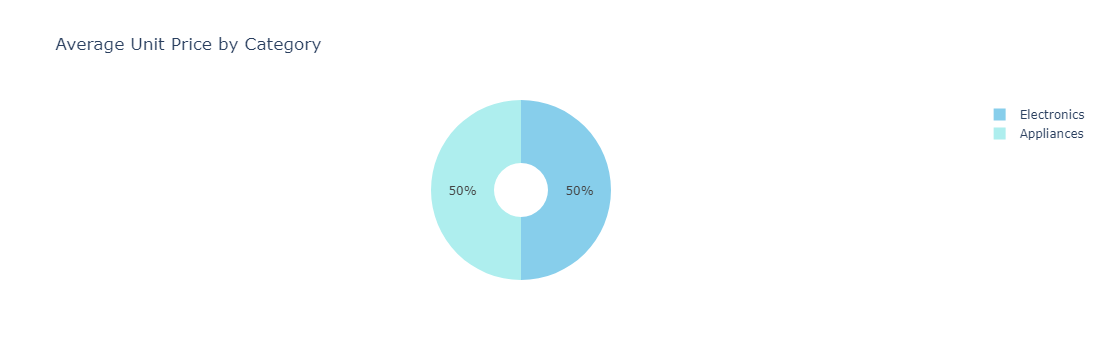

In [198]:
custom_blue_colors = ['#AEEEEE', '#87CEEB', '#4682B4', '#1E90FF', '#00BFFF'] 
fig = px.pie(average_unit_price, 
             names='category', 
             values='average_unit_price', 
             title='Average Unit Price by Category',
             color='category',
            color_discrete_sequence=custom_blue_colors,
             hole=0.3)
fig.show()

In [108]:
# Q3  Which stores are underperforming in terms of sales volume?

# Calculate the total quantity sold by store_id
store_sales_volume = data.groupby('store_id')['quantity_sold'].sum().reset_index()
# Rename the columns for clarity

store_sales_volume.columns = ['store_id', 'total_quantity_sold']

# Sort the result in ascending order
store_sales_volume_sorted = store_sales_volume.sort_values(by='total_quantity_sold',ascending= True).head(1)

# Display the result
print(store_sales_volume_sorted)

   store_id  total_quantity_sold
5         6                  658


In [112]:
#Q4  What percentage of transactions involved promotions?
# Count total transactions
total_transactions = len(data)

# Count transactions with promotions
transactions_with_promotions = data['promotion_applied'].sum()  # Assuming True indicates a promotion applied

# Calculate percentage
percentage_promotions = (transactions_with_promotions / total_transactions) * 100

# Display result
print(f"Percentage of Transactions Involving Promotions: {percentage_promotions:.2f}%")

Percentage of Transactions Involving Promotions: 52.14%


In [122]:
# Q5 What is the total revenue generated from sales during promotional events?

# Step 1: Filter data for promotional events
promotional_data = data[data['promotion_applied'] == True].copy()  # Use .copy() to avoid warnings

# Step 2: Calculate revenue for promotional transactions using .loc
promotional_data.loc[:, 'revenue'] = promotional_data['quantity_sold'] * promotional_data['unit_price']

# Step 3: Sum the revenue
total_revenue_promotions = promotional_data['revenue'].sum()

# Display the total revenue generated from sales during promotional events
print(f"Total Revenue Generated from Sales during Promotional Events: ${total_revenue_promotions:.2f}")

Total Revenue Generated from Sales during Promotional Events: $8062411.03


In [126]:
# Q6: Which product categories see the largest increase in demand during holidays?

# Step 1: Calculate total quantity sold during holidays
holiday_sales = data[data['holiday_indicator'] == True].groupby('category')['quantity_sold'].sum().reset_index()
holiday_sales.rename(columns={'quantity_sold': 'holiday_quantity_sold'}, inplace=True)

# Step 2: Calculate total quantity sold during non-holidays
non_holiday_sales = data[data['holiday_indicator'] == False].groupby('category')['quantity_sold'].sum().reset_index()
non_holiday_sales.rename(columns={'quantity_sold': 'non_holiday_quantity_sold'}, inplace=True)

# Step 3: Merge both DataFrames
merged_sales = pd.merge(holiday_sales, non_holiday_sales, on='category', how='outer').fillna(0)

# Step 4: Calculate increase in demand during holidays
merged_sales['demand_increase'] = merged_sales['holiday_quantity_sold'] - merged_sales['non_holiday_quantity_sold']

# Step 5: Sort the results by demand increase
sorted_results = merged_sales.sort_values(by='demand_increase', ascending=False)

# Display the results
print(sorted_results[['category', 'holiday_quantity_sold', 'non_holiday_quantity_sold', 'demand_increase']])

      category  holiday_quantity_sold  non_holiday_quantity_sold  \
1  Electronics                   3880                       3865   
0   Appliances                   3576                       3593   

   demand_increase  
1               15  
0              -17  


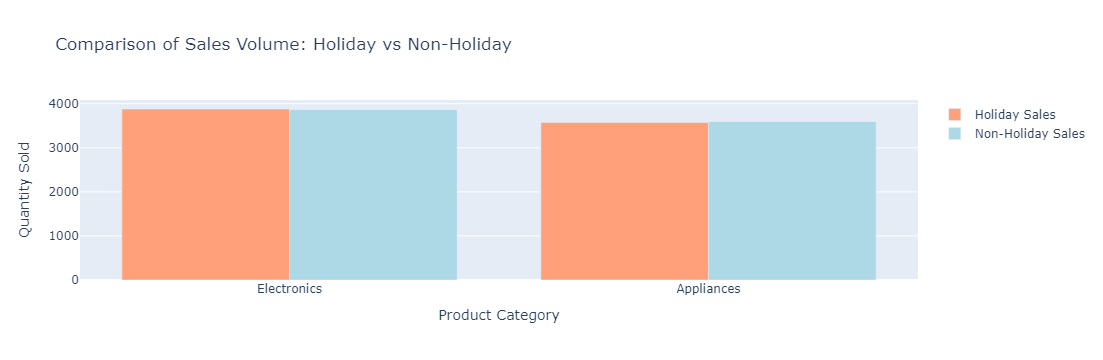

In [130]:
# Create a bar chart
fig = go.Figure()

# Add holiday sales to the bar chart
fig.add_trace(go.Bar(
    x=sorted_results['category'],
    y=sorted_results['holiday_quantity_sold'],
    name='Holiday Sales',
    marker_color='lightsalmon'
))

# Add non-holiday sales to the bar chart
fig.add_trace(go.Bar(
    x=sorted_results['category'],
    y=sorted_results['non_holiday_quantity_sold'],
    name='Non-Holiday Sales',
    marker_color='lightblue'
))

# Update layout
fig.update_layout(
    title='Comparison of Sales Volume: Holiday vs Non-Holiday',
    xaxis_title='Product Category',
    yaxis_title='Quantity Sold',
    barmode='group'
)

# Show the plot
fig.show()

In [142]:
# Q7: What is the correlation between weather conditions and sales performance?

# Group by weather conditions and calculate total revenue or quantity sold
weather_sales = data.groupby('weather_conditions').agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    total_revenue=('unit_price', lambda x: (x * data.loc[x.index, 'quantity_sold']).sum())
).reset_index()

# Display the aggregated data
print(weather_sales)



  weather_conditions  total_quantity_sold  total_revenue
0             Cloudy                 3823     3878416.82
1              Rainy                 3545     3562222.42
2             Stormy                 3707     3843358.52
3              Sunny                 3839     3979603.69


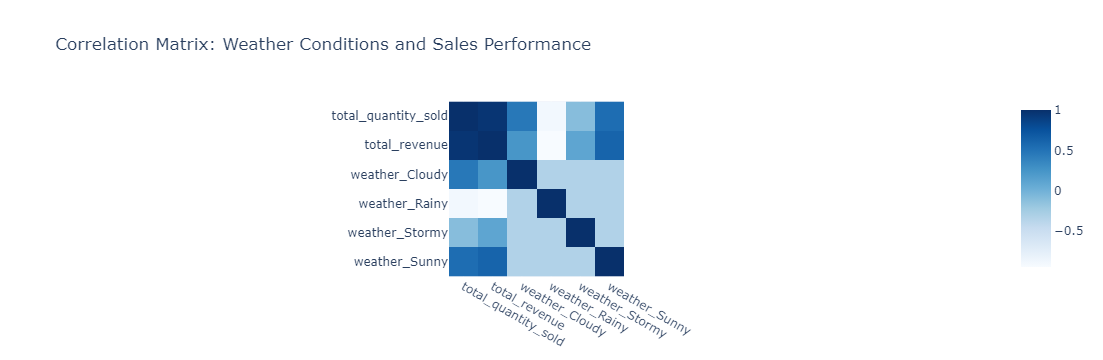

In [194]:
# Visualization 
# Plot correlation heatmap
fig = px.imshow(correlation_matrix, 
                title='Correlation Matrix: Weather Conditions and Sales Performance',
                color_continuous_scale='blues')

# Show the plot
fig.show()

In [154]:
# Q8: How does customer loyalty level affect purchasing patterns?

# Group by customer loyalty level and calculate total quantity sold
loyalty_quantity_sold = data.groupby('customer_loyalty_level')['quantity_sold'].sum().reset_index()

# Rename the columns for better understanding
loyalty_quantity_sold.columns = ['Customer Loyalty Level', 'Total Quantity Sold']

# Display the aggregated data
print(loyalty_quantity_sold)

  Customer Loyalty Level  Total Quantity Sold
0                 Bronze                 3714
1                   Gold                 3477
2               Platinum                 3896
3                 Silver                 3827


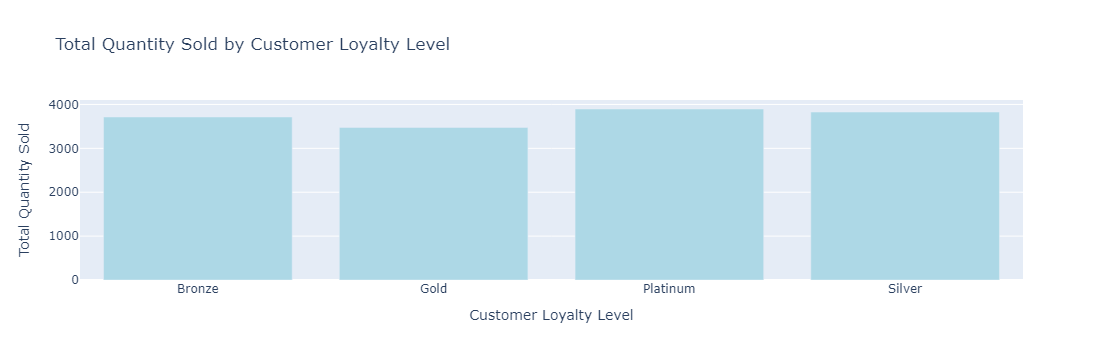

In [158]:
# visualization 

# Create a bar chart for total quantity sold by loyalty level
fig_quantity = go.Figure()

fig_quantity.add_trace(go.Bar(
    x=loyalty_quantity_sold['Customer Loyalty Level'], 
    y=loyalty_quantity_sold['Total Quantity Sold'],
    marker_color='lightblue'
))

# Update layout
fig_quantity.update_layout(
    title='Total Quantity Sold by Customer Loyalty Level',
    xaxis_title='Customer Loyalty Level',
    yaxis_title='Total Quantity Sold'
)

# Show the plot
fig_quantity.show()

In [168]:
# Q9: What is the forecast accuracy for each store location?

# Create a new column for the absolute difference
data['forecast_accuracy'] = abs(data['forecasted_demand'] - data['actual_demand'])

# Create a new column for percentage error
data['percentage_error'] = (data['forecast_accuracy'] / data['forecasted_demand']) * 100



In [170]:
# Q9: What is the forecast accuracy for each store location?

# Group by store location and calculate the average absolute difference
forecast_accuracy_by_store = data.groupby('store_location')['forecast_accuracy'].mean().reset_index()

# Alternatively, if using percentage error
# forecast_accuracy_by_store = data.groupby('store_location')['percentage_error'].mean().reset_index()

# Rename the columns for better understanding
forecast_accuracy_by_store.columns = ['Store Location', 'Average Forecast Accuracy']

# Display the aggregated data
print(forecast_accuracy_by_store)


    Store Location  Average Forecast Accuracy
0      Chicago, IL                 138.150049
1       Dallas, TX                 135.162325
2  Los Angeles, CA                 135.755299
3        Miami, FL                 140.740664
4     New York, NY                 137.945289


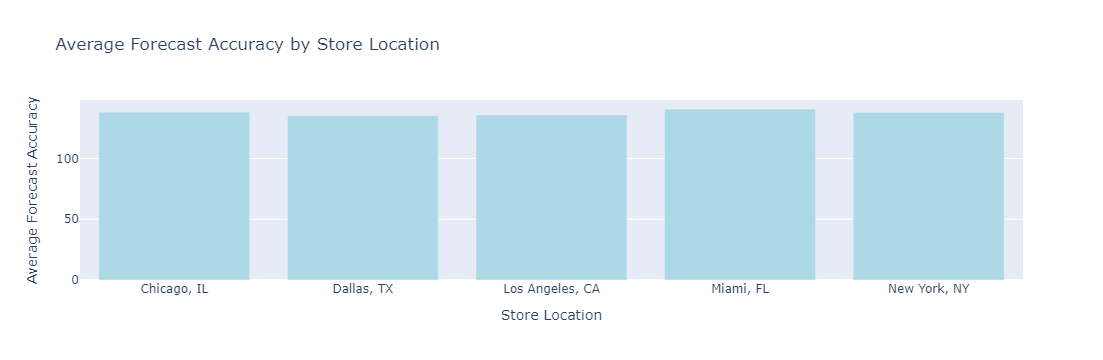

In [176]:
# Visualization 

# Create a bar chart for average forecast accuracy by store location
fig_forecast_accuracy = go.Figure()

fig_forecast_accuracy.add_trace(go.Bar(
    x=forecast_accuracy_by_store['Store Location'], 
    y=forecast_accuracy_by_store['Average Forecast Accuracy'],
    marker_color='lightblue'
))

# Update layout
fig_forecast_accuracy.update_layout(
    title='Average Forecast Accuracy by Store Location',
    xaxis_title='Store Location',
    yaxis_title='Average Forecast Accuracy'
)

# Show the plot
fig_forecast_accuracy.show()

In [182]:
# Q10: What is the stockout rate at each store?

# Create a new column for stockout occurrences
data['stockout'] = (data['inventory_level'] <= data['reorder_point']).astype(int)

# Calculate the total number of transactions per store
total_transactions = data.groupby('store_id').size().reset_index(name='total_transactions')

# Calculate the total stockouts per store
total_stockouts = data.groupby('store_id')['stockout'].sum().reset_index(name='total_stockouts')

# Merge both DataFrames
stockout_data = pd.merge(total_transactions, total_stockouts, on='store_id')

# Calculate stockout rate
stockout_data['stockout_rate'] = (stockout_data['total_stockouts'] / stockout_data['total_transactions']) * 100

# Display the stockout rate by store
print(stockout_data[['store_id', 'stockout_rate']])


    store_id  stockout_rate
0          1      18.250951
1          2      20.000000
2          3      15.139442
3          4      24.034335
4          5      21.722846
5          6      19.730942
6          7      16.115702
7          8      15.384615
8          9      18.218623
9         10      18.032787
10        11      17.928287
11        12      18.181818
12        13      20.075758
13        14      19.762846
14        15      21.484375
15        16      13.095238
16        17      22.448980
17        18      19.277108
18        19      20.717131
19        20      18.677043


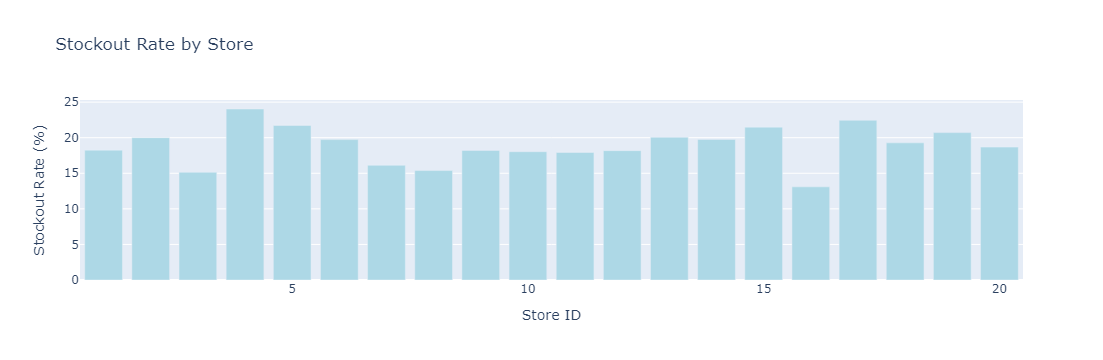

In [186]:
# Visualization 

# Create a bar chart for stockout rate by store
fig_stockout_rate = go.Figure()

fig_stockout_rate.add_trace(go.Bar(
    x=stockout_data['store_id'], 
    y=stockout_data['stockout_rate'],
    marker_color='Lightblue'
))

# Update layout
fig_stockout_rate.update_layout(
    title='Stockout Rate by Store',
    xaxis_title='Store ID',
    yaxis_title='Stockout Rate (%)'
)

# Show the plot
fig_stockout_rate.show()